In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#!pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Predict Price of Airline Tickets.csv')
df.head(5)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

#EDA

In [ ]:
#fillna values
df.Route=df.Route.fillna('Unkown1')
df.Total_Stops=df.Total_Stops.fillna('non-stop')



In [ ]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [ ]:
#change Total_stops from object to int
#df['Total_Stops'].unique()
df['Total_Stops']=df['Total_Stops'].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops',],[0,2,1,3,4])
#df['Total_Stops']=df['Total_Stops'].astype('int')

#change date_of_journey to datetime object 
df['Date_of_Journey']=df['Date_of_Journey'].astype('datetime64[ns]')
df['year']=df['Date_of_Journey'].dt.year
df['month']=df['Date_of_Journey'].dt.month
df['day']=df['Date_of_Journey'].dt.day

df['Dep_Time'] = df['Dep_Time'].astype('datetime64[ns]')
df['Dep_Time']=df.Dep_Time.dt.hour


#df['Duration']=pd.to_datetime(df['Duration'])

 


In [ ]:
df.head(5)




Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR ? NAG ? DEL   

   Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  year  \
0        22  01:10 22 Mar   2h 50m            0         No info   3897  2019   
1         5         13:15   7h 25m            2         No info   7662  2019   
2         9  04:25 10 Jun      19h            2         No info  13882  2019   
3        18         23:30   5h 25m            1         No info   6218  2019   
4        16         21:35   4h 45m            1         No info  13302  2019   

   month  day  
0      3   24  
1      1    5  
2      9    6  
3     12    5  
4      1    3

In [ ]:
df['day'].unique()
df['year'].unique()

array([2019])

In [ ]:
df.shape

(10683, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  int64         
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  int64         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  year             10683 non-null  int64         
 12  month            10683 non-null  int64         
 13  day              10683 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object

In [ ]:
df.isna().sum().sum()

0

In [ ]:
# search row of null values|

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN
#had been filled

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price, year, month, day]
Index: []

In [ ]:
df.duplicated().sum()

220

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.describe()

Dep_Time   Total_Stops         Price     year         month  \
count  10683.000000  10683.000000  10683.000000  10683.0  10683.000000   
mean      12.490686      0.824113   9087.064121   2019.0      5.534775   
std        5.748650      0.675244   4611.359167      0.0      2.987489   
min        0.000000      0.000000   1759.000000   2019.0      1.000000   
25%        8.000000      0.000000   5277.000000   2019.0      3.000000   
50%       11.000000      1.000000   8372.000000   2019.0      5.000000   
75%       18.000000      1.000000  12373.000000   2019.0      6.000000   
max       23.000000      4.000000  79512.000000   2019.0     12.000000   

                day  
count  10683.000000  
mean      12.682205  
std        8.803701  
min        3.000000  
25%        5.000000  
50%        6.000000  
75%       21.000000  
max       27.000000

In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df.corr()

Dep_Time  Total_Stops     Price  year     month       day
Dep_Time     1.000000    -0.061402  0.006819   NaN  0.028180 -0.002251
Total_Stops -0.061402     1.000000  0.603891   NaN  0.065472 -0.024033
Price        0.006819     0.603891  1.000000   NaN  0.010700 -0.165412
year              NaN          NaN       NaN   NaN       NaN       NaN
month        0.028180     0.065472  0.010700   NaN  1.000000 -0.264899
day         -0.002251    -0.024033 -0.165412   NaN -0.264899  1.000000

In [ ]:
#function to represent relation between two features
def func_plot(f1_name,f2_name):
  fig,axes=plt.subplots(2,2,figsize=(12,15))
  sns.lineplot(data=df,x=f1_name,y=f2_name,ax=axes[0,0]).set(title="Lineplot")
  sns.barplot(data=df,x=f1_name,y=f2_name,ax=axes[0,1]).set(title="Barplot")
  sns.scatterplot(data=df,x=f1_name,y=f2_name,ax=axes[1,0]).set(title="Scatterplot")
  sns.histplot(data=df,x=f1_name,y=f2_name,ax=axes[1,1]).set(title="Histplot")

Text(0.5, 1.0, 'Airlines that has most rides')

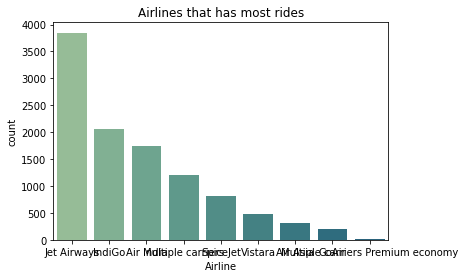

In [ ]:
fig=figsize=(20,8)
a=sns.countplot(data=df,x='Airline',order=df['Airline'].value_counts().index,palette='crest')
a.set_xlim(-0.5,8.5)
a.set_title('Airlines that has most rides')
#df.groupby("Airline")['Price'].nlargest(5)

Text(0.5, 1.0, 'Airlines that has most flights')

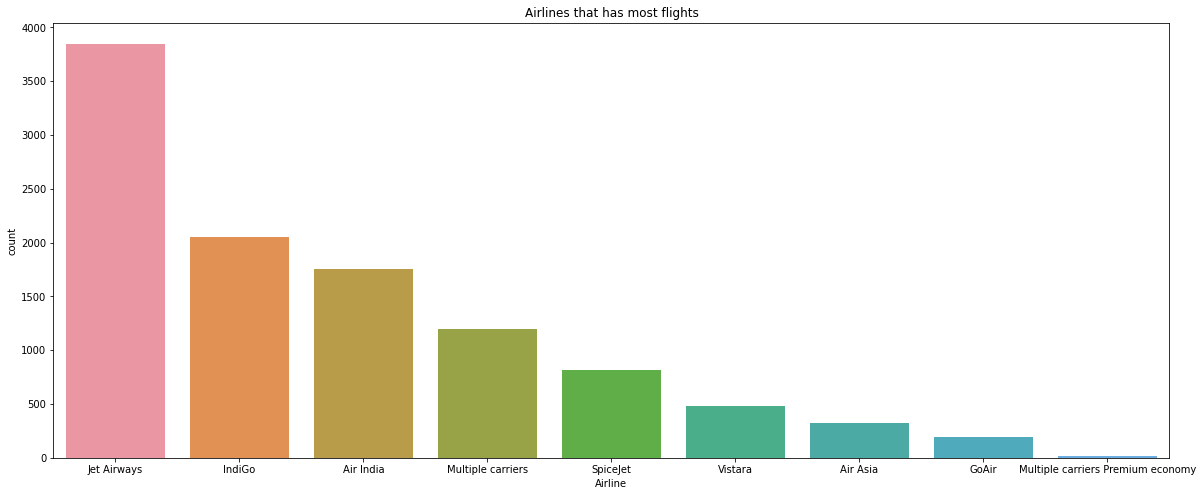

In [ ]:
#Let's check which airline has most rides
plt.figure(figsize=(20,8))
a=sns.countplot(data=df, x='Airline', order = df['Airline'].value_counts().index)
a.set_xlim(-0.5,8.5)
a.set_title('Airlines that has most flights')

#Jet Airways has most flights

Text(0.5, 1.0, 'Airline with highest tickets price')

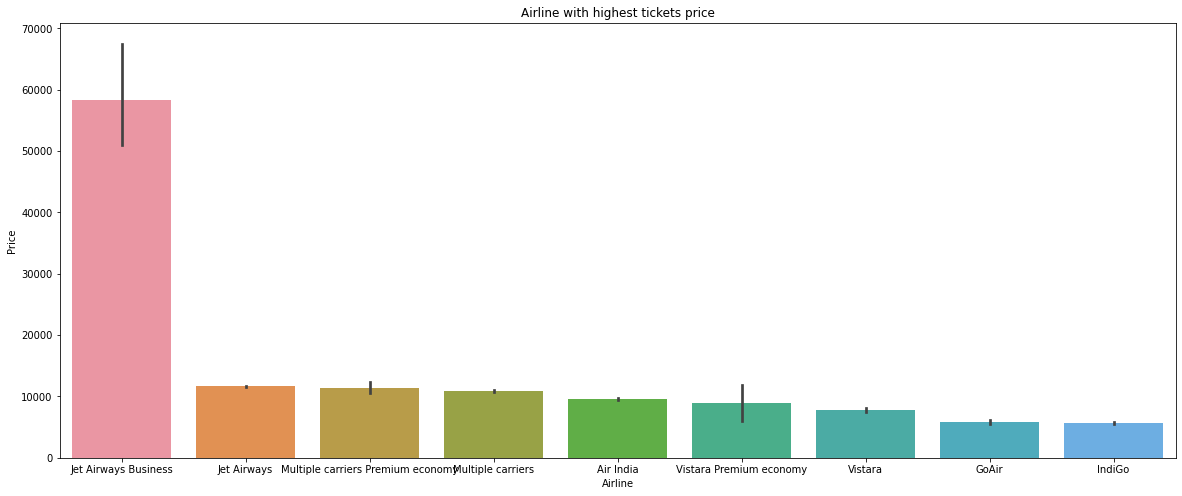

In [ ]:
#get airline of highest price
plt.figure(figsize=(20,8))
order=df.groupby(['Airline'])['Price'].mean().sort_values(ascending=False).index
b=sns.barplot(data=df,x='Airline',y='Price',order=order)
b.set_xlim(-0.5,8.5)
b.set_title("Airline with highest tickets price")

In [ ]:
df.head(1)

Airline Date_of_Journey    Source Destination      Route  Dep_Time  \
0  IndiGo      2019-03-24  Banglore   New Delhi  BLR ? DEL        22   

   Arrival_Time Duration  Total_Stops Additional_Info  Price  year  month  day  
0  01:10 22 Mar   2h 50m            0         No info   3897  2019      3   24

In [ ]:
#func_plot('Airline','Total_Stops')
#func_plot('Airline','Price')


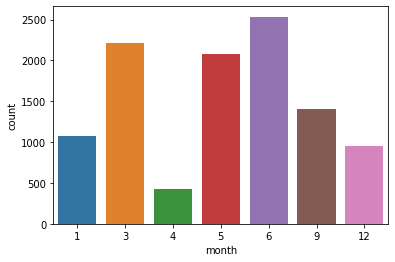

In [ ]:
sns.countplot(data=df,x='month')
#max number of tickets sold in june

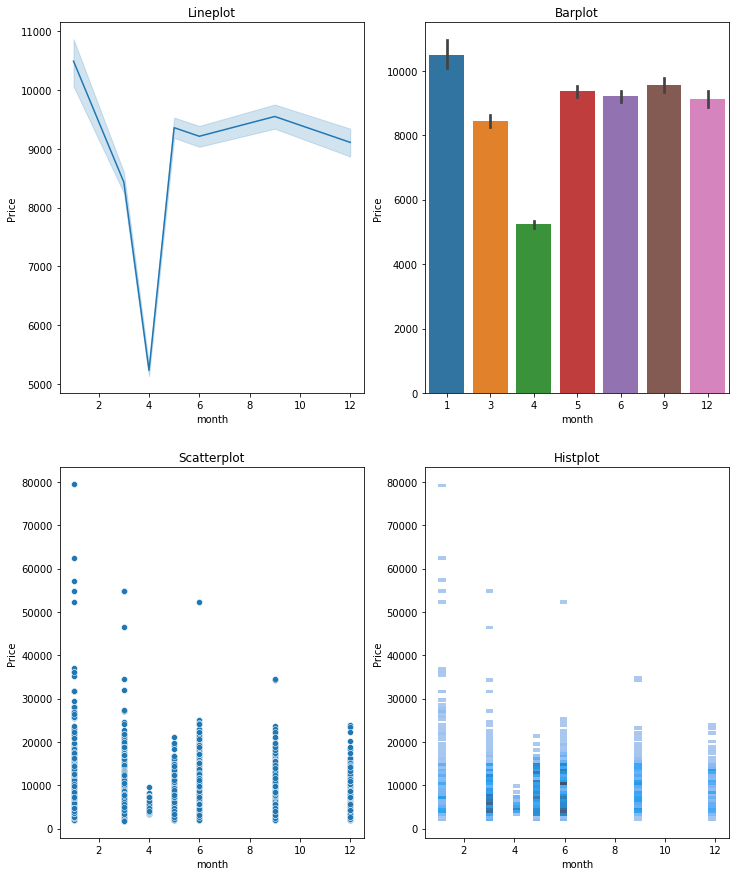

In [ ]:
func_plot('month','Price')
#highest tickets price is in january 
#lowest tickets price is in April


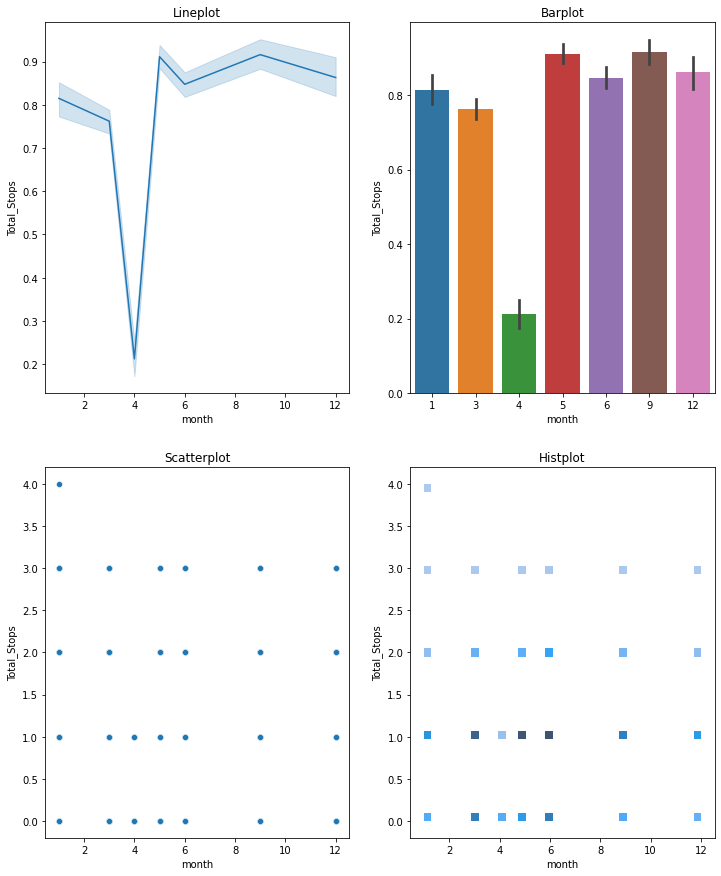

In [ ]:
func_plot('month','Total_Stops')

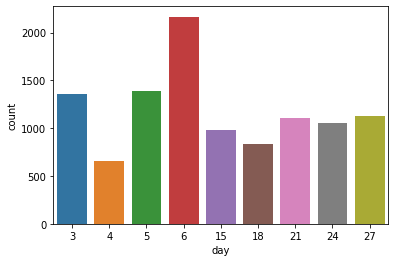

In [ ]:
sns.countplot(data=df,x='day')
#hieghst number of flieghts is in day 6 in month

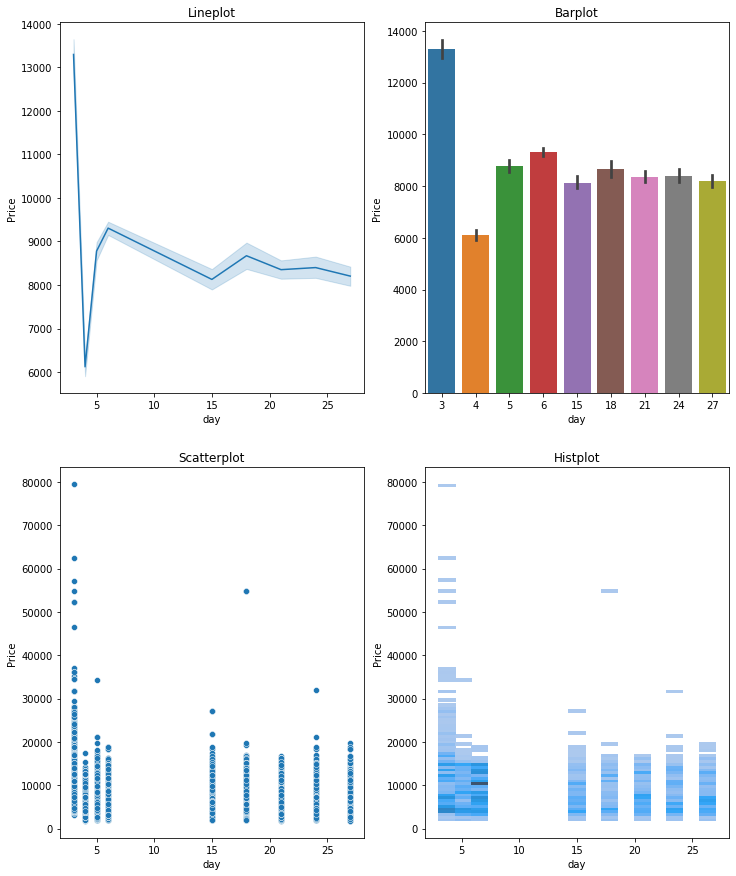

In [ ]:
func_plot('day','Price')
#highest price in day 3 
#lowest price in day 4 

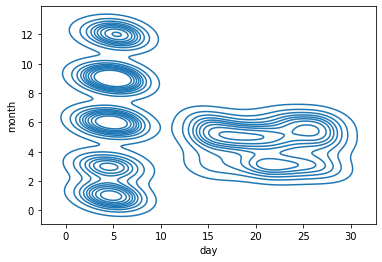

In [ ]:
#func_plot('month','day')
sns.kdeplot(data=df,x='day',y='month')

In [ ]:
df.head(1)

Airline Date_of_Journey    Source Destination      Route  Dep_Time  \
0  IndiGo      2019-03-24  Banglore   New Delhi  BLR ? DEL        22   

   Arrival_Time Duration  Total_Stops Additional_Info  Price  year  month  day  
0  01:10 22 Mar   2h 50m            0         No info   3897  2019      3   24

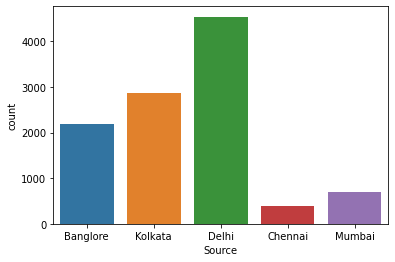

In [ ]:
sns.countplot(data=df,x='Source')
#max number of flights is from delhi
#min flights is from chennai

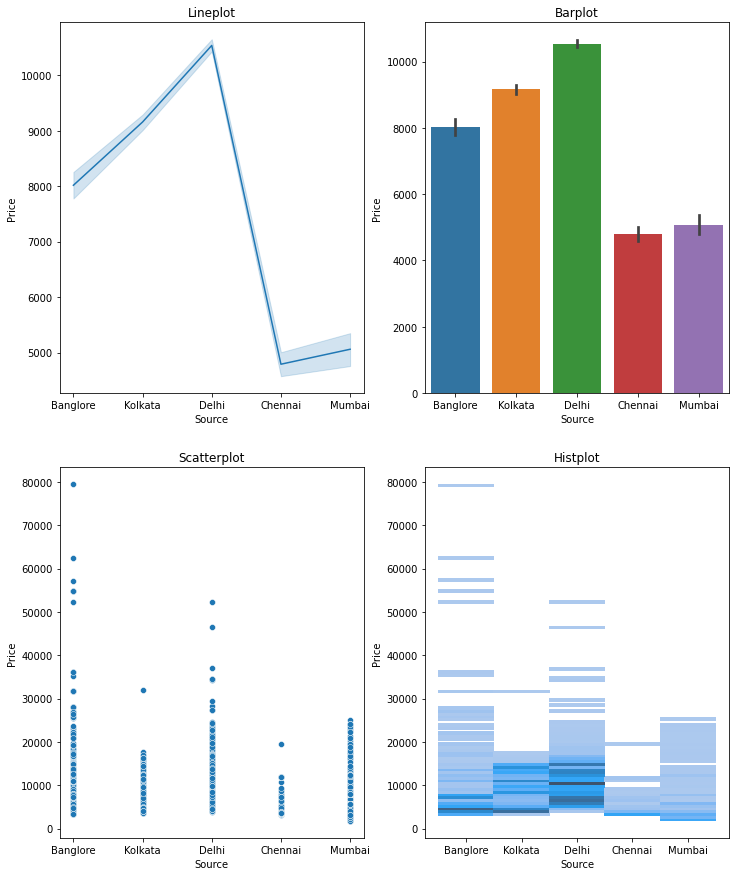

In [ ]:
func_plot('Source','Price')
#max price is from delhi
#min price is from chinnai

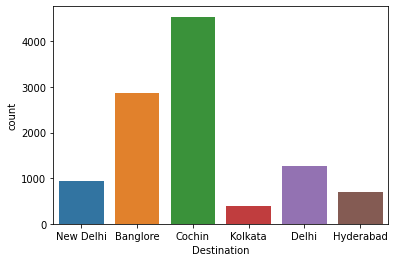

In [ ]:
sns.countplot(data=df,x='Destination')
#max flights is for cochin

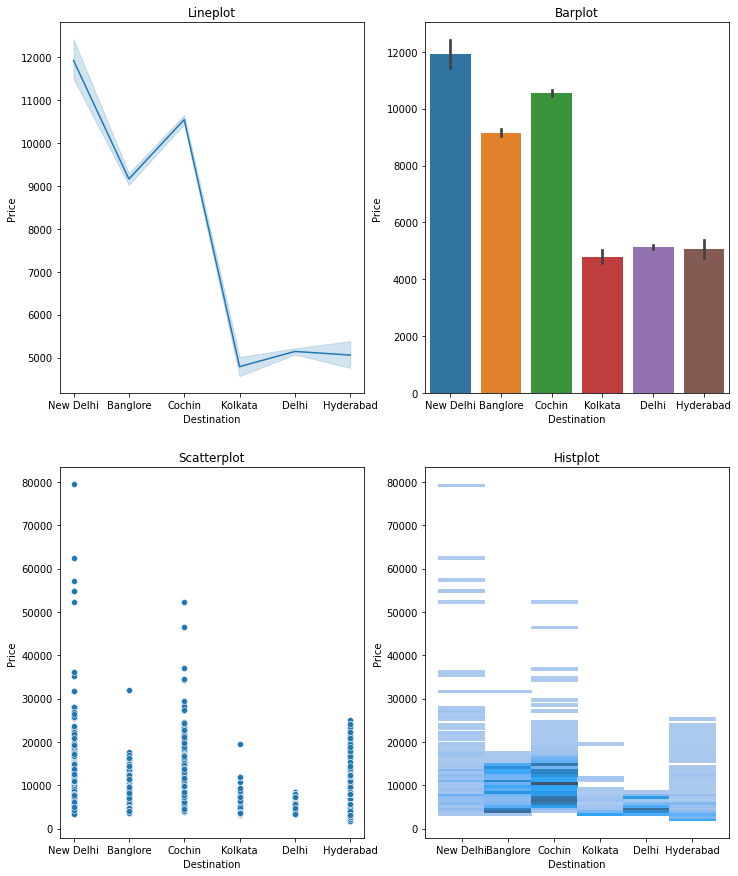

In [ ]:
func_plot('Destination','Price')

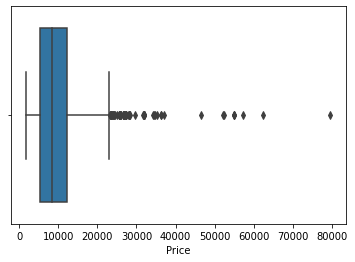

In [ ]:
sns.boxplot(data=df,x='Price')

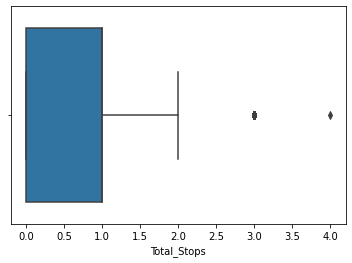

In [ ]:
sns.boxplot(data=df,x='Total_Stops')

In [ ]:
pd.crosstab(df.Source,df.Destination,normalize=0)
#no relation bet source and destnation

Destination  Banglore  Cochin     Delhi  Hyderabad  Kolkata  New Delhi
Source                                                                
Banglore          0.0     0.0  0.575785        0.0      0.0   0.424215
Chennai           0.0     0.0  0.000000        0.0      1.0   0.000000
Delhi             0.0     1.0  0.000000        0.0      0.0   0.000000
Kolkata           1.0     0.0  0.000000        0.0      0.0   0.000000
Mumbai            0.0     0.0  0.000000        1.0      0.0   0.000000

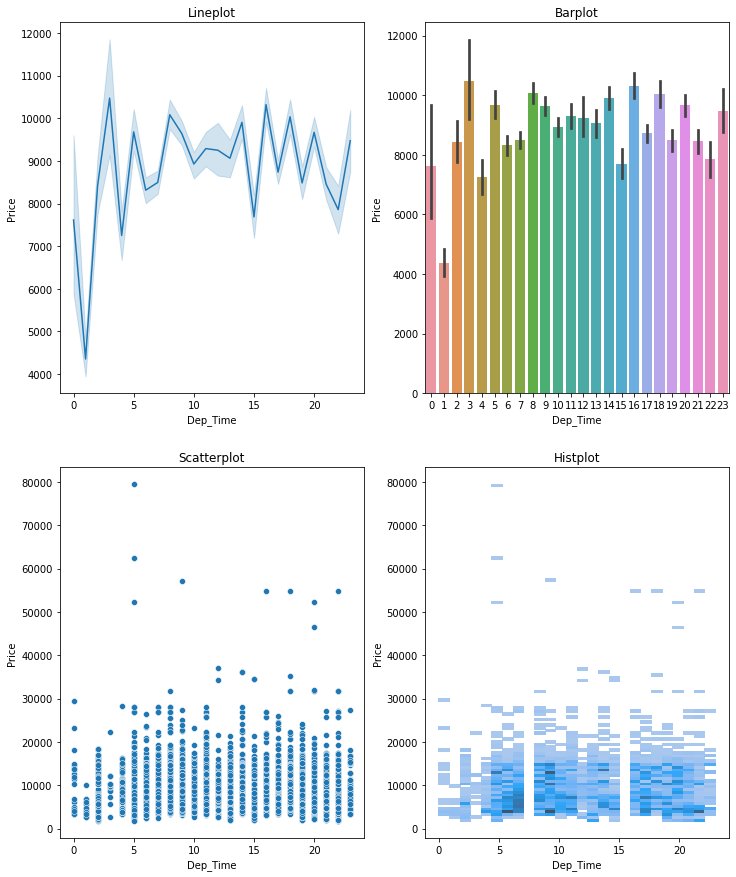

In [ ]:
func_plot('Dep_Time','Price')

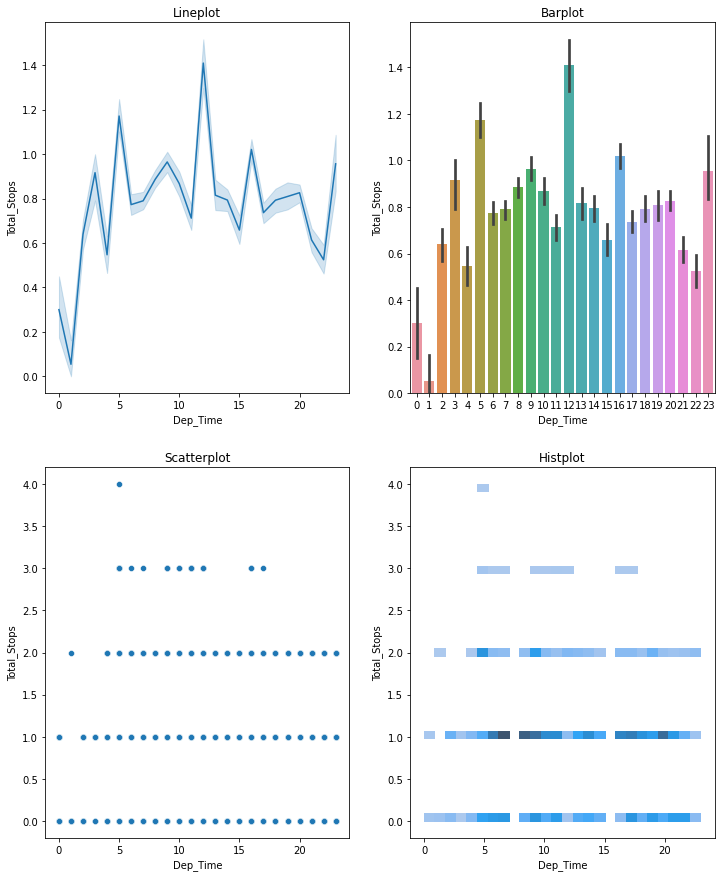

In [ ]:
func_plot('Dep_Time',"Total_Stops")

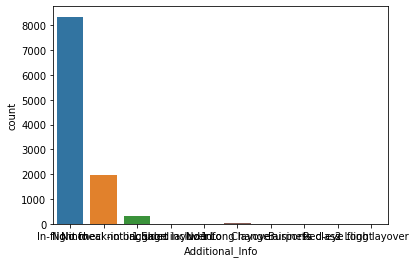

In [ ]:
sns.countplot(data=df,x='Additional_Info')
#no meal included in more than 8000  ticket
#Q

# Regression Models

In [ ]:
df.drop('year',axis=1,inplace=True)
df.head()

df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'month', 'day'],
      dtype='object')

In [ ]:
#change dataset to numeric value using label encoder

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df=df.apply(le.fit_transform)

df.head()




Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0        3               11       0            5     18        22   
1        1                2       3            0     84         5   
2        4               35       2            1    118         9   
3        3               38       3            0     91        18   
4        3                0       0            5     29        16   

   Arrival_Time  Duration  Total_Stops  Additional_Info  Price  month  day  
0           233       240            0                8     65      1    7  
1           906       336            2                8    669      0    2  
2           413       106            2                8   1537      5    3  
3          1324       311            1                8    389      6    2  
4          1237       303            1                8   1457      0    0

In [ ]:
#Function to get check Preformance of the model

def check_pref(ytest,ypred):
  from sklearn.metrics import mean_squared_error,r2_score

  print(f"mean_squared_error is: {round(mean_squared_error(ytest,ypred),4)}") 
  print(f"root mean squared error is: {round(np.sqrt(mean_squared_error(ytest,y_pred)),4)}")

  print("-----------------------------------------")
  print(f"Preformance of model is: {round((r2_score(ytest,ypred)*100),4)} ")


In [ ]:
#Function to get Bias and Variance Errors

#def get_B_V(model_name):
#  avg_loss,avg_bias,avg_var=bias_variance_decomp(model_name,x_train,y_train,x_test,y_test,loss='mse',random_seed=42)

#  print(f"avg loss :{round(avg_loss,4)}")
#  print(f"Bias error is: {round(avg_bias,4)}")
#  print(f"Variance error is: {round(avg_var,4)}")

##Linear Regression model

In [ ]:
# select x and y
x=df.drop('Price',axis=1).values
y=df['Price'].values

In [ ]:
from pandas.core.common import random_state
#split x and y by train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [ ]:
#make the linear model

from sklearn import linear_model
 
model_1=linear_model.LinearRegression()

model_1.fit(x_train,y_train)

y_pred=model_1.predict(x_test)






In [ ]:
#check the preformance of the model

from sklearn.metrics import mean_squared_error,r2_score

print(f"mean_squared_error is: {mean_squared_error(y_test,y_pred)}")
print(f"root mean squared error is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

print("-----------------------------------------")
print(f"Preformance of model is: {r2_score(y_test,y_pred)*100} ")

mean_squared_error is: 154203.34461138066
root mean squared error is: 392.68733696336665
-----------------------------------------
Preformance of model is: 52.49778375733358 


In [ ]:
y_pred_test=model_1.predict(x_test)
y_pred_train=model_1.predict(x_train)

print(f"mean_squared_error is: {mean_squared_error(y_test,y_pred_test)}")
print(f"root mean squared error is: {np.sqrt(mean_squared_error(y_test,y_pred_test))}")

print(f"mean_squared_error is: {mean_squared_error(y_train,y_pred_train)}")
print(f"root mean squared error is: {np.sqrt(mean_squared_error(y_train,y_pred_train))}")



mean_squared_error is: 154203.34461138066
root mean squared error is: 392.68733696336665
mean_squared_error is: 152088.23319763236
root mean squared error is: 389.9849140641627


In [ ]:
#check bias and var erros
avg_loss,avg_bias,avg_var=bias_variance_decomp(model_1,x_train,y_train,x_test,y_test,loss='mse',random_seed=42)

print(f"Bias error is: {avg_bias}")
print(f"Variance error is: {avg_var}")

#model is underfiting

Bias error is: 154178.16589699642
Variance error is: 272.9443153342775


In [ ]:
from scipy.linalg.matfuncs import absolute
# using Kfold and grid_search

from sklearn.model_selection import KFold,cross_val_score

cv=KFold(n_splits=5,random_state=2500,shuffle=True)
scores=cross_val_score(model_1,x,y,scoring='neg_mean_squared_error',cv=cv)

print(f"mean_squared_error is: {np.mean(absolute(scores))}")

mean_squared_error is: 153036.45194137367


##Polynomial Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.33,random_state=1)

model_2=linear_model.LinearRegression()

model_2.fit(x_train,y_train)

y_pred2=model_2.predict(x_test)





In [ ]:
#check the preformance of the model

from sklearn.metrics import mean_squared_error,r2_score

print(f"mean_squared_error is: {mean_squared_error(y_test,y_pred2)}")
print(f"root mean squared error is: {np.sqrt(mean_squared_error(y_test,y_pred2))}")

print("-----------------------------------------")
print(f"Preformance of model is: {r2_score(y_test,y_pred2)*100} ")

mean_squared_error is: 78671.17336969903
root mean squared error is: 280.48382015670535
-----------------------------------------
Preformance of model is: 75.76540833864678 


In [ ]:
from scipy.linalg.matfuncs import absolute
# using Kfold and grid_search

from sklearn.model_selection import KFold,cross_val_score

cv=KFold(n_splits=5,random_state=2500,shuffle=True)
scores=cross_val_score(model_1,x,y,scoring='neg_mean_squared_error',cv=cv)

print(f"mean_squared_error is: {np.mean(absolute(scores))}")

mean_squared_error is: 153036.45194137367


In [ ]:
#check bias and var erros
avg_loss,avg_bias,avg_var=bias_variance_decomp(model_2,x_train,y_train,x_test,y_test,loss='mse',num_rounds=30,random_seed=42)

print(f"avg loss :{avg_loss}")
print(f"Bias error is: {avg_bias}")
print(f"Variance error is: {avg_var}")

#model is overfitting

avg loss :264075.4101959685
Bias error is: 87774.52229889587
Variance error is: 176300.88789707265


In [ ]:
#using ridge to overcome overfitting
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

#get the best alpha
alpha_range=10.**np.arange(-2,3)

ridge_reg_cv=RidgeCV(alphas=alpha_range,normalize=True,scoring='neg_mean_squared_error')
ridge_reg_cv.fit(x_train,y_train)
ridge_reg_cv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.01

In [ ]:
#using ridge to overcome overfitting
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


#best aplha is 0.01 

RidgeRegressor=Ridge(alpha = 0.01)
RidgeRegressor.fit(x_train,y_train)
y_pred_r=RidgeRegressor.predict(x_test)

#see the errors

print(f"Preformance of model is: {r2_score(y_test,y_pred_r)*100} ")

avg_loss,avg_bias,avg_var=bias_variance_decomp(RidgeRegressor,x_train,y_train,x_test,y_test,loss='mse',random_seed=42,num_rounds=30)
print(f"avg loss :{round(avg_loss,4)}")
print(f"Bias error is: {round(avg_bias,4)}")
print(f"Variance error is: {round(avg_var,4)}")



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.86251e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.16943e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Preformance of model is: 76.51307238054228 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.16756e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.16967e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.16809e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.75699e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

avg loss :117324.1416
Bias error is: 77577.2045
Variance error is: 39746.9371


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.15142e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


##Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_3=DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.33, random_state=1)
model_3.fit(x_train,y_train)
y_pred3=model_3.predict(x_test)



In [ ]:
#check the preformance of the model

from sklearn.metrics import mean_squared_error,r2_score

print(f"mean_squared_error is: {round(mean_squared_error(y_test,y_pred3),4)}")
print(f"root mean squared error is: {round(np.sqrt(mean_squared_error(y_test,y_pred3)),4)}")

print("-----------------------------------------")
print(f"Preformance of model is: {round((r2_score(y_test,y_pred3)*100),4)} ")

mean_squared_error is: 45998.4622
root mean squared error is: 214.4725
-----------------------------------------
Preformance of model is: 85.8615 


In [ ]:
df.columns
col_names=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'month', 'day']

In [ ]:
from sklearn import tree


print(tree.export_text(model_3,feature_names=col_names))

|--- Total_Stops <= 0.50
|   |--- Date_of_Journey <= 0.50
|   |   |--- Destination <= 4.50
|   |   |   |--- Source <= 2.50
|   |   |   |   |--- Dep_Time <= 7.50
|   |   |   |   |   |--- value: [833.00]
|   |   |   |   |--- Dep_Time >  7.50
|   |   |   |   |   |--- Dep_Time <= 11.00
|   |   |   |   |   |   |--- value: [616.00]
|   |   |   |   |   |--- Dep_Time >  11.00
|   |   |   |   |   |   |--- value: [615.00]
|   |   |   |--- Source >  2.50
|   |   |   |   |--- Duration <= 120.50
|   |   |   |   |   |--- value: [1352.00]
|   |   |   |   |--- Duration >  120.50
|   |   |   |   |   |--- value: [1028.00]
|   |   |--- Destination >  4.50
|   |   |   |--- Dep_Time <= 5.50
|   |   |   |   |--- value: [1110.00]
|   |   |   |--- Dep_Time >  5.50
|   |   |   |   |--- Arrival_Time <= 1269.00
|   |   |   |   |   |--- Dep_Time <= 11.50
|   |   |   |   |   |   |--- value: [1672.00]
|   |   |   |   |   |--- Dep_Time >  11.50
|   |   |   |   |   |   |--- Airline <= 5.50
|   |   |   |   |   |   |  

In [ ]:
import graphviz

tree_fig = tree.export_graphviz(model_3,feature_names=col_names, filled=True)

graph = graphviz.Source(tree_fig, format='png')

graph



In [ ]:
#check bias and var erros
avg_loss,avg_bias,avg_var=bias_variance_decomp(model_3,x_train,y_train,x_test,y_test,loss='mse',random_seed=42)

print(f"avg loss :{avg_loss}")
print(f"Bias error is: {avg_bias}")
print(f"Variance error is: {avg_var}")

avg loss :63112.51396328549
Bias error is: 30512.70465490455
Variance error is: 32599.809308380936


In [ ]:
#using Kfold and crossvalidation

cv=KFold(n_splits=5,random_state=32,shuffle=True)
scores=cross_val_score(model_3,x,y,scoring='neg_mean_squared_error',cv=cv)

print(f"mean_squared_error is: {round(np.mean(absolute(scores)),4)}")

mean_squared_error is: 31445.6474


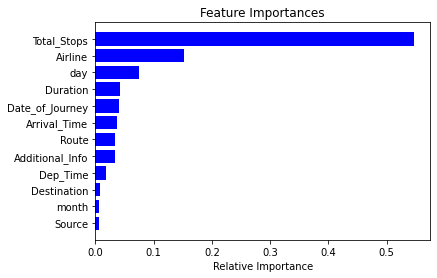

In [ ]:
importances = model_3.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[col_names[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()

## Random Forset Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_4=RandomForestRegressor(random_state=0, max_depth=19, min_samples_split = 2, n_estimators=20) #'max_depth': 19, 'min_samples_split': 2, 'n_estimators': 100 #random_state=0, max_depth=100, min_samples_split = 10, n_estimators=20

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.33)
model_4.fit(x_train,y_train)
y_pred4=model_4.predict(x_test)


In [ ]:
check_pref(y_test,y_pred4)

mean_squared_error is: 21532.6609
root mean squared error is: 392.6873
-----------------------------------------
Preformance of model is: 93.3669 


In [ ]:
avg_loss,avg_bias,avg_var=bias_variance_decomp(model_4,x_train,y_train,x_test,y_test,loss='mse',random_seed=42)

print(f"avg loss :{avg_loss}")
print(f"Bias error is: {avg_bias}")
print(f"Variance error is: {avg_var}")

avg loss :27226.42069105132
Bias error is: 21855.430376518587
Variance error is: 5370.9903145327335


In [ ]:
from sklearn.model_selection import GridSearchCV


parm_grid = { 'n_estimators' : [5,6,8,7,22,10,80,100],
              'max_depth' : [5,10,3,100,200,19,90,48,300],
             'min_samples_split': [1,2,3,4,5]
}

RFR = RandomForestRegressor(random_state=0)

g_search = GridSearchCV(estimator = RFR, param_grid=parm_grid, cv=5)


g_search.fit(x_train,y_train)

print(g_search.best_params_)

KeyboardInterrupt: ignored

In [ ]:
اimportances = model_4.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[col_names[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()